# Part 1: Low Level Vision (image > image)
> ## Week 1 ( Basic Image Processing Techniques)¶
>> **05- Dithering (Quantization, Ordered Dither, Floyd-Steinberg)**

This is the curriculum for "Learn Computer Vision" by Siraj Raval on Youtube
https://github.com/llSourcell/Learn_Computer_Vision

In [1]:
import numpy as np
import cv2
from tqdm import tqdm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Quantization

### 1.1 Quantization in Signal Processing

Quantization, in mathematics and digital signal processing, is the process of mapping input values from a large set (often a continuous set) to output values in a (countable) smaller set, often with a finite number of elements. 

`Rounding` and `Truncation` are typical examples of quantization processes.

The difference between an input value and its quantized value (such as round-off error) is referred to as **Quantization error**.


### 1.2 Quantization in image processing
Quantization, involved in image processing, is a lossy compression technique achieved by compressing a range of values to a single quantum value. 

When the number of discrete symbols in a given stream is reduced, the stream becomes more compressible. For example, reducing the number of colors required to represent a digital image makes it possible to reduce its file size. 

Specific applications include DCT data quantization in JPEG and DWT data quantization in JPEG 2000.


### 1.3 Color Quantization
In computer graphics, color quantization is quantization applied to color spaces; it is a process that reduces the number of distinct colors used in an image, usually with the intention that the new image should be as visually similar as possible to the original image. 

Color quantization is critical for displaying images with many colors on devices that can only display a limited number of colors, usually due to memory limitations, and enables efficient compression of certain types of images. The most popular algorithm by far for color quantization, invented by Paul Heckbert in 1979, is the median cut algorithm. 
Nowadays, color quantization is mainly used in `GIF and PNG images`. 

Color quantization is frequently combined with dithering, which can eliminate unpleasant artifacts such as banding that appear when quantizing smooth gradients and give the appearance of a larger number of colors.


### 1.3.1 manually applying KMeans clustering algorithm 


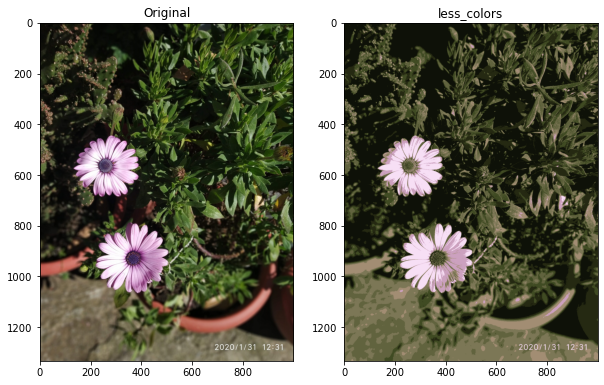

In [2]:
n_colors = 8
img = cv2.imread("flower.jpg")
orig = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

arr = img.reshape((-1, 3))
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
less_colors = centers[labels].reshape(img.shape).astype('uint8')
less_colors = cv2.cvtColor(less_colors, cv2.COLOR_BGR2RGB)

# plot it
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(orig)
ax1.title.set_text("Original")
ax2.imshow(less_colors)
ax2.title.set_text("less_colors")

### 1.3.2 Using PIL library for quantization

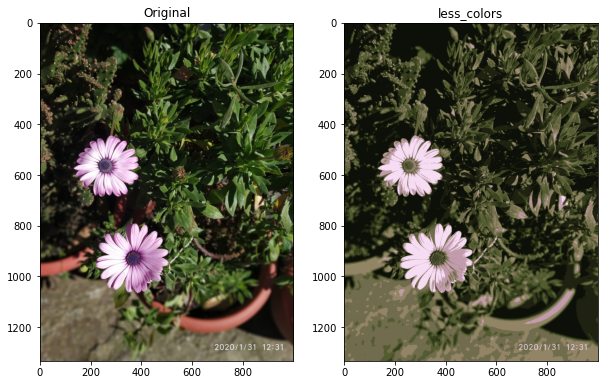

In [3]:
from PIL import Image

# Signature: img.quantize(colors=256, method=None, kmeans=0, palette=None)
# Docstring:
# Convert the image to 'P' mode with the specified number
# of colors.

# :param colors: The desired number of colors, <= 256
# :param method: 0 = median cut
#                1 = maximum coverage
#                2 = fast octree
#                3 = libimagequant
# :param kmeans: Integer
# :param palette: Quantize to the palette of given :py:class:`PIL.Image.Image`.
# :returns: A new image


img = Image.open("flower.jpg")
less_colors = img.quantize(colors=8,method=0,kmeans=5)


# plot it
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(img)
ax1.title.set_text("Original")
ax2.imshow(less_colors)
ax2.title.set_text("less_colors")

## 2. Dithering
Reducing the color depth of an image can often have significant visual side-effects. If the original image is a photograph, it is likely to have thousands, or even millions of distinct colors. The process of constraining the available colors to a specific color palette effectively throws away a certain amount of color information.

Dither is an intentionally applied form of noise used to randomize quantization error, preventing large-scale patterns such as color banding in images. Dither is routinely used in processing of both digital audio and video data. A common use of dither is converting a greyscale image to black and white, such that the density of black dots in the new image approximates the average grey level in the original one.

Dithering is used in computer graphics to create the illusion of "color depth" in images with a limited color palette(color quantization). In a dithered image, colors that are not available in the palette are approximated by a diffusion of colored pixels from within the available palette.

If the original pixel colors are simply translated into the closest available color from the palette, no dithering will occur. However, typically this approach will result in flat areas (contours) and a loss of detail, and may produce patches of color(color banding) that are significantly different from the original. Dithering helps to reduce color banding and flatness.



### 2.1 Ordered Dithering
Ordered dithering is an image dithering algorithm. It is commonly used to display a continuous image on a display of smaller color depth. For example, Microsoft Windows uses it in 16-color graphics modes. The algorithm is characterized by noticeable crosshatch patterns in the result.

The algorithm reduces the number of colors by applying a threshold map M to the pixels displayed, causing some pixels to change color, depending on the distance of the original color from the available color entries in the reduced palette.


### 2.2 Floyd–Steinberg Dithering
Floyd–Steinberg dithering is an image dithering algorithm first published in 1976 by Robert W. Floyd and Louis Steinberg. It is commonly used by image manipulation software, for example when an image is converted into GIF format that is restricted to a maximum of 256 colors.

The algorithm achieves dithering using error diffusion, meaning it pushes (adds) the residual quantization error of a pixel onto its neighboring pixels, to be dealt with later.

In the following pseudocode we can see the algorithm described above. The values of the input image's pixels are normalized in floating point format to [0,1] with 0 (black) and 1 (white).

`
for each y from top to bottom
   for each x from left to right
      oldpixel  := pixel[x][y]
      newpixel  := find_closest_palette_color(oldpixel)
      pixel[x][y]  := newpixel
      quant_error  := oldpixel - newpixel
      pixel[x + 1][y    ] := pixel[x + 1][y    ] + quant_error * 7 / 16
      pixel[x - 1][y + 1] := pixel[x - 1][y + 1] + quant_error * 3 / 16
      pixel[x    ][y + 1] := pixel[x    ][y + 1] + quant_error * 5 / 16
      pixel[x + 1][y + 1] := pixel[x + 1][y + 1] + quant_error * 1 / 16
`


  0%|                                           | 2/1332 [00:00<01:41, 13.15it/s]

for blue


  0%|                                           | 2/1332 [00:00<01:41, 13.06it/s]

for green


  0%|                                           | 2/1332 [00:00<01:40, 13.23it/s]

for red


  0%|                                           | 2/1332 [00:00<01:41, 13.06it/s]

for gray-scale


100%|████████████████████████████████████████| 1332/1332 [01:40<00:00, 13.24it/s]


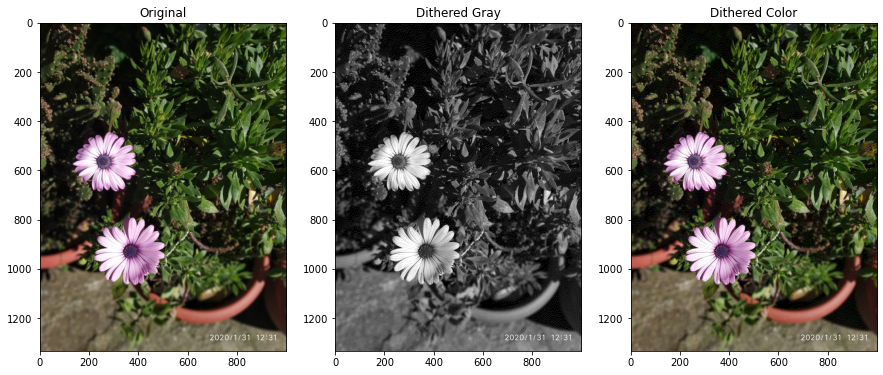

In [4]:
# dithering using Floyd–Steinberg Dithering algo
def dithering(img, factor=1):
    
    height,width = img.shape
    
    # loop over the image
    for y in tqdm(range(0, height-1)):
        for x in range(1, width-1):
            # threshold the pixel
            old_p = img[y, x]
            
            new_p = np.round(factor * old_p/255.0) * (255/factor)
            img[y, x] = new_p
            
            quant_error_p = old_p - new_p
            
            img[y, x+1]   = np.clip(img[y, x+1]   + quant_error_p * 7 / 16.0, 0,255)
            img[y+1, x-1] = np.clip(img[y+1, x-1] + quant_error_p * 3 / 16.0, 0,255)
            img[y+1, x]   = np.clip(img[y+1, x]   + quant_error_p * 5 / 16.0, 0,255)
            img[y+1, x+1] = np.clip(img[y+1, x+1] + quant_error_p * 1 / 16.0, 0,255)

    return img

img = cv2.imread("flower.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print("for blue")
blue=img[:,:,0]
blue=dithering(blue)

print("for green")
green=img[:,:,1]
green=dithering(green)

print("for red")
red=img[:,:,2]
red=dithering(red)

print("for gray-scale")
result_gray= dithering(img_gray)
result = cv2.merge((blue, green, red))
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,10))
ax1.imshow(img_rgb)
ax1.title.set_text("Original")
ax2.imshow(result_gray,cmap='gray')
ax2.title.set_text("Dithered Gray")
ax3.imshow(result_rgb)
ax3.title.set_text("Dithered Color")

## references:
- https://en.wikipedia.org/wiki/Quantization
- https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering
- https://en.wikipedia.org/wiki/Ordered_dithering
- https://en.wikipedia.org/wiki/Dither
- https://en.wikipedia.org/wiki/Quantization_(image_processing)
- https://en.wikipedia.org/wiki/Quantization_(signal_processing)
- https://en.wikipedia.org/wiki/Color_quantization
- https://www.youtube.com/watch?v=0L2n8Tg2FwI&t=0s&list=WL&index=151
- http://study.marearts.com/2018/10/dithering-python-opencv-source-code.html
- http://www.tannerhelland.com/4660/dithering-eleven-algorithms-source-code/